In [ ]:
*************************************

In [31]:

### TEST FUNCTIONS
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
from os import listdir
from os.path import isfile, join
import os
from scipy import signal


def highpass_filter(y, sr):
  filter_stop_freq = 20  # Hz
  filter_pass_freq = 10000  # Hz
  filter_order = 1001

  # High-pass filter
  nyquist_rate = sr
  desired = (0, 0, 1, 1)
  bands = (0, filter_stop_freq, filter_pass_freq, nyquist_rate)
  filter_coefs = signal.firls(filter_order, bands, desired, nyq=nyquist_rate)

  # Apply high-pass filter
  filtered_audio = signal.filtfilt(filter_coefs, [1], y)
  return filtered_audio


##FUNCTIONS
def convert_single_audio_to_image(audio_path,Filtered=True,spectrogram_dimensions = (64,64)):
    data, sr = librosa.load(audio_path, sr = 44100)  
    print("sr={}".format(sr))
    if Filtered:
        data=highpass_filter(data, sr)
    #Make a mel spectrogram from audio
    spec = librosa.feature.melspectrogram(y=data, sr=sr)
    #Convert amplitude to decibels
    db_spec = librosa.power_to_db(spec, ref=np.max)
    fig = plt.figure()
    
    
   # fig.set_size_inches((spectrogram_dimensions[0]/fig.get_dpi(), spectrogram_dimensions[1]/fig.get_dpi()))
    
    #Display final mel spectrogram
    librosa.display.specshow(db_spec, sr=sr,x_axis='time',y_axis='mel')
    plt.colorbar()
    plt.show()
    


Asellia tridens
count of Wav_files in Identified calls/Asellia tridens= 5
ASETRI_058_20180212_D1000.WAV

Without  a High Pass Filter
sr=44100


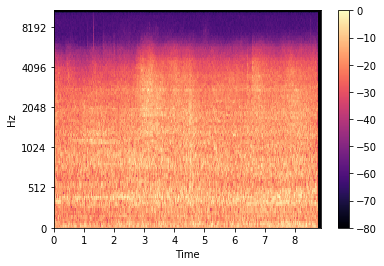


With  a High Pass Filter
sr=44100


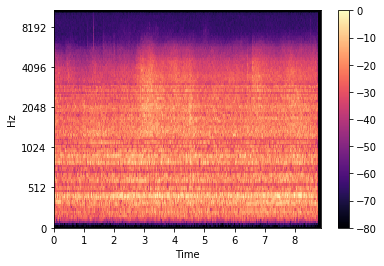

ASETRI_058_20180212_D1000_10X.wav

Without  a High Pass Filter
sr=44100


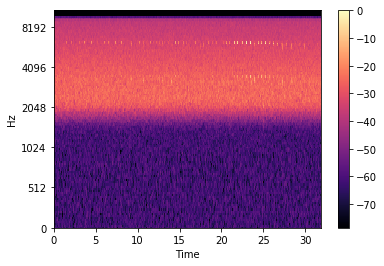


With  a High Pass Filter
sr=44100


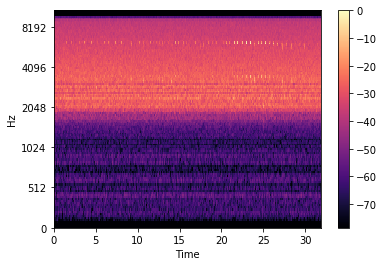

ASETRI_058_20180212_D240.wav

Without  a High Pass Filter
sr=44100


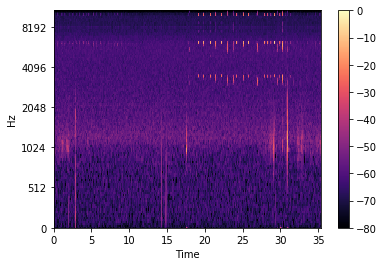


With  a High Pass Filter
sr=44100


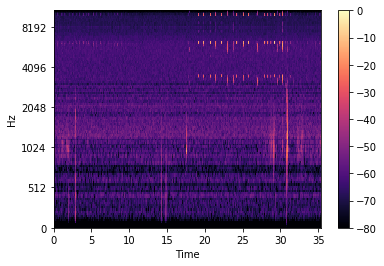

ASETRI_20180118_D1000.png
ASETRI_20180118_D1000.wav

Without  a High Pass Filter
sr=44100


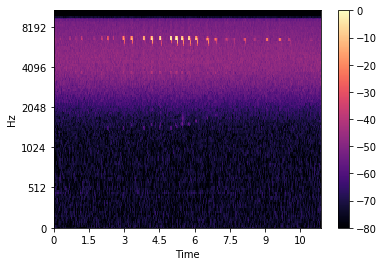


With  a High Pass Filter
sr=44100


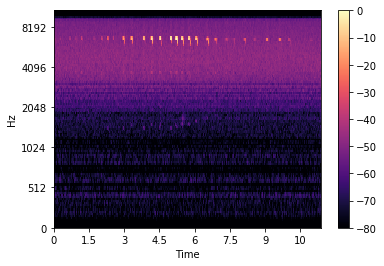

In [33]:
##TEST 
if __name__ == '__main__':
    audio_folder_name= r'Identified calls'
    subfolders=listdir(audio_folder_name)[:1]
    for subf in subfolders:
        print (subf)
        audio_folder_path=  audio_folder_name+"/"+subf 
        file_names = [f for f in listdir(audio_folder_path)[:5]]
        print("count of Wav_files in {}= {}".format(audio_folder_path,len(file_names)))
        for file_name in file_names:
            name, ext = os.path.splitext(file_name)
            print(file_name)
            if (ext=='.wav'):
                 audio_path = audio_folder_path + '\\' + file_name
            elif(ext=='.WAV'):
                 audio_path = audio_folder_path + '\\' + file_name.replace('.WAV', '.wav')
            elif (ext=='.png'):
                continue
            
            print("\nWithout  a High Pass Filter")
            convert_single_audio_to_image(audio_path,Filtered=False)
            
            print("\nWith  a High Pass Filter")
            convert_single_audio_to_image(audio_path,Filtered=True)
            